In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read in the data
MLB = pd.read_excel("MLB_game_log_2018.xlsx")
print(MLB.columns.tolist())

['Date', 'DoubleHeader', 'DayOfWeek', 'VisitingTeam', 'VisitingTeamLeague', 'VisitingTeamGameNumber', 'HomeTeam', 'HomeTeamLeague', 'HomeTeamGameNumber', 'VisitorRunsScored', 'HomeRunsScore', 'LengthInOuts', 'DayNight', 'CompletionInfo', 'ForfeitInfo', 'ProtestInfo', 'ParkID', 'Attendence', 'Duration', 'VisitorLineScore', 'HomeLineScore', 'VisitorAB', 'VisitorH', 'VisitorD', 'VisitorT', 'VisitorHR', 'VisitorRBI', 'VisitorSH', 'VisitorSF', 'VisitorHBP', 'VisitorBB', 'VisitorIBB', 'VisitorK', 'VisitorSB', 'VisitorCS', 'VisitorGDP', 'VisitorCI', 'VisitorLOB', 'VisitorPitchers', 'VisitorER', 'VisitorTER', 'VisitorWP', 'VisitorBalks', 'VisitorPO', 'VisitorA', 'VisitorE', 'VisitorPassed', 'VisitorDB', 'VisitorTP', 'HomeAB', 'HomeH', 'HomeD', 'HomeT', 'HomeHR', 'HomeRBI', 'HomeSH', 'HomeSF', 'HomeHBP', 'HomeBB', 'HomeIBB', 'HomeK', 'HomeSB', 'HomeCS', 'HomeGDP', 'HomeCI', 'HomeLOB', 'HomePitchers', 'HomeER', 'HomeTER', 'HomeWP', 'HomeBalks', 'HomePO', 'HomeA', 'HomeE', 'HomePassed', 'HomeDB',

In [5]:
# Create df containing only the variables we need
# Create a counter

MLB18 = MLB[['VisitingTeam','HomeTeam','VisitorRunsScored','HomeRunsScore','Date']]
MLB18 = MLB18.rename(columns={'VisitorRunsScored':'VisR','HomeRunsScore':'HomR'})
MLB18['count']=1
MLB18

,VisitingTeam,HomeTeam,VisR,HomR,Date,count
0,COL,ARI,2,8,20180329,1
1,PHI,ATL,5,8,20180329,1
2,SFN,LAN,1,0,20180329,1
3,CHN,MIA,8,4,20180329,1
4,SLN,NYN,4,9,20180329,1
...,...,...,...,...,...,...
2426,CHA,MIN,4,5,20180930,1
2427,TEX,SEA,1,3,20180930,1
2428,TOR,TBA,4,9,20180930,1
2429,MIL,CHN,3,1,20181001,1


In [17]:
MLB18Home = MLB18[['HomeTeam','HomR','VisR','count','Date']].copy()
MLB18Home['home']=1
MLB18Home = MLB18Home.rename(columns={'HomeTeam':'team','HomR':'R', 'VisR':'RA'})
MLB18Home

,team,R,RA,count,Date,home
0,ARI,8,2,1,20180329,1
1,ATL,8,5,1,20180329,1
2,LAN,0,1,1,20180329,1
3,MIA,4,8,1,20180329,1
4,NYN,9,4,1,20180329,1
...,...,...,...,...,...,...
2426,MIN,5,4,1,20180930,1
2427,SEA,3,1,1,20180930,1
2428,TBA,9,4,1,20180930,1
2429,CHN,1,3,1,20181001,1


In [19]:
MLB18Away= MLB18[['VisitingTeam','VisR', 'HomR','count','Date']].copy()
MLB18Away['away']=1
MLB18Away = MLB18Away.rename(columns={'VisitingTeam':'team','VisR':'R','HomR':'RA'})
MLB18Away

,team,R,RA,count,Date,away
0,COL,2,8,1,20180329,1
1,PHI,5,8,1,20180329,1
2,SFN,1,0,1,20180329,1
3,CHN,8,4,1,20180329,1
4,SLN,4,9,1,20180329,1
...,...,...,...,...,...,...
2426,CHA,4,5,1,20180930,1
2427,TEX,1,3,1,20180930,1
2428,TOR,4,9,1,20180930,1
2429,MIL,3,1,1,20181001,1


In [21]:
# Here is where the approach differs from the previous notebooks. Instead of taking sums and averages, we first 
# concatenate, meaning that we stack performances as home team and away team. This creates a list of games played
# by each team across the season. The list is 4,862 rows long, which is twice the number of games played in the regular
# season. 

MLB18Comb = pd.concat([MLB18Home, MLB18Away])
MLB18Comb

,team,R,RA,count,Date,home,away
0,ARI,8,2,1,20180329,1.0,NaN
1,ATL,8,5,1,20180329,1.0,NaN
2,LAN,0,1,1,20180329,1.0,NaN
3,MIA,4,8,1,20180329,1.0,NaN
4,NYN,9,4,1,20180329,1.0,NaN
...,...,...,...,...,...,...,...
2426,CHA,4,5,1,20180930,NaN,1.0
2427,TEX,1,3,1,20180930,NaN,1.0
2428,TOR,4,9,1,20180930,NaN,1.0
2429,MIL,3,1,1,20181001,NaN,1.0


In [22]:
MLB18Comb["win"] = np.where(MLB18Comb["R"] > MLB18Comb["RA"], 1, 0)
MLB18Comb

,team,R,RA,count,Date,home,away,win
0,ARI,8,2,1,20180329,1.0,NaN,1
1,ATL,8,5,1,20180329,1.0,NaN,1
2,LAN,0,1,1,20180329,1.0,NaN,0
3,MIA,4,8,1,20180329,1.0,NaN,0
4,NYN,9,4,1,20180329,1.0,NaN,1
...,...,...,...,...,...,...,...,...
2426,CHA,4,5,1,20180930,NaN,1.0,0
2427,TEX,1,3,1,20180930,NaN,1.0,0
2428,TOR,4,9,1,20180930,NaN,1.0,0
2429,MIL,3,1,1,20181001,NaN,1.0,1


In [28]:
half1 = MLB18Comb[MLB18Comb['Date'] < 20180717]
half2 = MLB18Comb[MLB18Comb['Date'] > 20180717]

In [30]:
half2.describe()

,R,RA,count,Date,home,away,win
count,1976.000000,1976.000000,1976.0,1.976000e+03,988.0,988.0,1976.000000
mean,4.494433,4.494433,1.0,2.018084e+07,1.0,1.0,0.500000
std,3.219870,3.219870,0.0,7.011522e+01,0.0,0.0,0.500127
min,0.000000,0.000000,1.0,2.018072e+07,1.0,1.0,0.000000
25%,2.000000,2.000000,1.0,2.018081e+07,1.0,1.0,0.000000
50%,4.000000,4.000000,1.0,2.018082e+07,1.0,1.0,0.500000
75%,6.000000,6.000000,1.0,2.018091e+07,1.0,1.0,1.000000
max,25.000000,25.000000,1.0,2.018100e+07,1.0,1.0,1.000000


In [37]:
half1perf = half1.groupby("team")[["R", "RA", "win", "count"]].sum().reset_index()
half1perf.rename(columns={"count": "count1", "win":"win1", "R": "R1", "RA": "RA1"}, inplace=True)
half1perf['wpc1'] = half1perf["win1"] / half1perf["count1"]
half1perf['pyth_exp1'] = half1perf["R1"]**2 / (half1perf["R1"]**2 + half1perf["RA1"]**2)
half1perf

,team,R1,RA1,win1,count1,wpc1,pyth_exp1
0,ANA,425,401,49,97,0.505155,0.529031
1,ARI,421,378,53,97,0.546392,0.553662
2,ATL,456,388,52,94,0.553191,0.580049
3,BAL,345,504,28,97,0.288660,0.319067
4,BOS,530,367,68,98,0.693878,0.675908
5,CHA,384,510,33,95,0.347368,0.361805
6,CHN,476,362,55,93,0.591398,0.633566
7,CIN,461,493,43,96,0.447917,0.466495
8,CLE,487,405,52,95,0.547368,0.591158
9,COL,467,468,51,96,0.531250,0.498930


In [41]:
half2perf = half2.groupby("team")[["R", "RA", "win", "count"]].sum().reset_index()
half2perf.rename(columns={"count": "count2", "win":"win2", "R": "R2", "RA": "RA2"}, inplace=True)
half2perf['wpc2'] = half2perf["win2"] / half2perf["count2"]
half2perf['pyth_exp2'] = half2perf["R2"]**2 / (half2perf["R2"]**2 + half2perf["RA2"]**2)
half2perf

,team,R2,RA2,win2,count2,wpc2,pyth_exp2
0,ANA,296,321,31,65,0.476923,0.459548
1,ARI,272,266,29,65,0.446154,0.511151
2,ATL,303,269,38,68,0.558824,0.559231
3,BAL,277,388,19,65,0.292308,0.337607
4,BOS,346,280,40,64,0.625000,0.604272
5,CHA,272,338,29,67,0.432836,0.393055
6,CHN,285,283,40,70,0.571429,0.503521
7,CIN,235,326,24,66,0.363636,0.341948
8,CLE,331,243,39,67,0.582090,0.649789
9,COL,313,277,40,67,0.597015,0.560791


In [43]:
Half2predictor = pd.merge(half1perf, half2perf, on="team")
Half2predictor

,team,R1,RA1,win1,count1,wpc1,pyth_exp1,R2,RA2,win2,count2,wpc2,pyth_exp2
0,ANA,425,401,49,97,0.505155,0.529031,296,321,31,65,0.476923,0.459548
1,ARI,421,378,53,97,0.546392,0.553662,272,266,29,65,0.446154,0.511151
2,ATL,456,388,52,94,0.553191,0.580049,303,269,38,68,0.558824,0.559231
3,BAL,345,504,28,97,0.288660,0.319067,277,388,19,65,0.292308,0.337607
4,BOS,530,367,68,98,0.693878,0.675908,346,280,40,64,0.625000,0.604272
5,CHA,384,510,33,95,0.347368,0.361805,272,338,29,67,0.432836,0.393055
6,CHN,476,362,55,93,0.591398,0.633566,285,283,40,70,0.571429,0.503521
7,CIN,461,493,43,96,0.447917,0.466495,235,326,24,66,0.363636,0.341948
8,CLE,487,405,52,95,0.547368,0.591158,331,243,39,67,0.582090,0.649789
9,COL,467,468,51,96,0.531250,0.498930,313,277,40,67,0.597015,0.560791


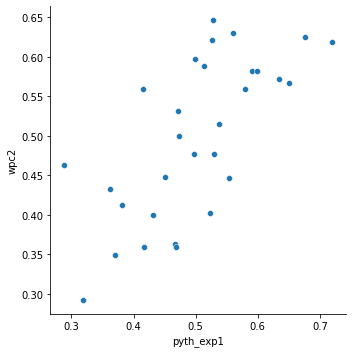

In [45]:
# First, plot Pythagorean Expectation against win percentage in the second half of the season

sns.relplot(x="pyth_exp1", y="wpc2", data = Half2predictor)

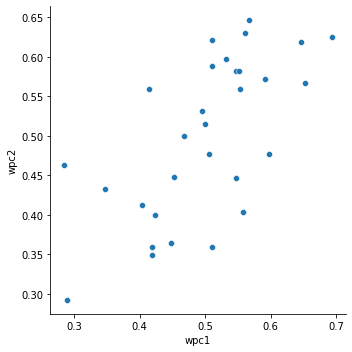

In [46]:
# Now, compare this with a plot of win percentage from the first half of the season against win percentage
#in the second half of the season


sns.relplot(x="wpc1", y="wpc2", data = Half2predictor)

In [48]:
# The two plots look similar
# We can be more precise still if we compare the correlation coefficients. The first row of the table shows the 
# correlation of win percentage in second half of the season against itself, win percentage in the first half of the season,
# Pythagorean Expectation in the first half of the season, and Pythagorean Expectation in the second half of the season.
# Our focus is on comparing the second and third columns.

keyvars = Half2predictor[['team','wpc2','wpc1','pyth_exp1','pyth_exp2']]
keyvars.corr()

,wpc2,wpc1,pyth_exp1,pyth_exp2
wpc2,1.000000,0.652549,0.690752,0.924473
wpc1,0.652549,1.000000,0.941082,0.577847
pyth_exp1,0.690752,0.941082,1.000000,0.659521
pyth_exp2,0.924473,0.577847,0.659521,1.000000


In [49]:
# We can also sort the variables to show for each club how close the relationships are between the first and second half
# of the season

keyvars = keyvars.sort_values(by=['wpc2'],ascending=False)
keyvars

,team,wpc2,wpc1,pyth_exp1,pyth_exp2
19,OAK,0.646154,0.567010,0.527439,0.681224
15,MIL,0.630769,0.561224,0.560795,0.574983
4,BOS,0.625000,0.693878,0.675908,0.604272
26,TBA,0.621212,0.510417,0.525559,0.585571
11,HOU,0.619048,0.646465,0.719748,0.641553
9,COL,0.597015,0.531250,0.498930,0.560791
25,SLN,0.588235,0.510638,0.513494,0.589046
8,CLE,0.582090,0.547368,0.591158,0.649789
13,LAN,0.582090,0.552083,0.598539,0.683228
6,CHN,0.571429,0.591398,0.633566,0.503521


Conclusion
We can see from the correlation matrix that win percentage in the second half of the season is correlated with win percentage in the first half of the season - the correlation coefficient is +0.653. It's not surprising that performance in the first half of the season is to an extent predictive of performance in the second half. But there are also clearly things that can change.

When we sort the teams from highest to lowest send half of season win percentage, we find a mixed picture. Some clubs perform with less than one percentage point difference in each half, e.g. The Brave (ATL), the Padres (SDN) or the Orioles (BAL), while others differed by more than ten percentage points, e.g. the Rays (TBA), the Mets (NYN) or the Mariners (SEA).

We could simply use first half win percentage as a predictor of second half win percentage, but when we look at the correlation matrix we can see that the Pythagorean Expectation is an even better forecast - the correlation coefficient is higher, at +0.691. To be sure, the difference is not large, but it is slightly better. This was, in fact, the initial impetus for Bill James when introducing the statistic. He argued that a win could ride on lucky hit and the difference of just one run, which made wins a less reliable predictor than the aggregate capacity to produce runs and limit conceding runs. As in many aspects of baseball analysis, our data show that James was quite right.